# Animaciones con matplotlib

Este es el recurso adicional para el video Cómo hacer una animación en matplotlib 2024. Con este notebook podrás seguir las instrucciones del video y probar cambios con las funciones.

Checa la documentación para `matplotlib.animation.FuncAnimation` aquí:

https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html

## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint

## Animación de función seno

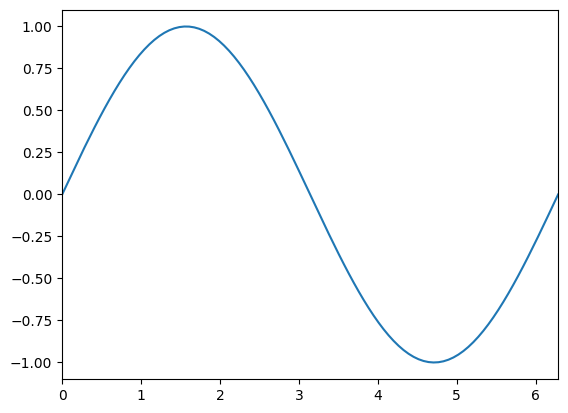

In [2]:
x = np.linspace(-2 * np.pi, 2 * np.pi,200)
nframes = 100

def func(frame):
  ax.clear()
  plt.plot(x,np.sin((x-(2 * np.pi * frame/nframes))))
  plt.xlim([0, 2 * np.pi])
  plt.ylim([-1.1, 1.1])

fig, ax = plt.subplots()

anim = FuncAnimation(fig,func,100,interval=33)
anim.save("seno.mp4")

## Animación de sistema dinámico

Animación del sistema de ecuaciones diferenciales siguiente a través del tiempo dados distintos puntos o valores iniciales de $x_1$ y $x_2$.

$$
\begin {align}
&\frac{dx_1}{dt} =\mu\: x_1-x_2-x_1\left(x_1^{2} +x_2^{2}\right)\\
&\frac{dx_2}{dt} =x_1+\mu\: x_2-x_2\left(x_1^{2} +x_2^{2}\right)
\end {align}
$$

In [3]:
# Configuración de animación
nframes = 300
npuntos = 200
t_simulacion = 10 # segundos
fps = nframes / t_simulacion # frames por segundo
int_miliseg = int(1000 * 1/fps) # milisegundos entre cada frame

print(f"fps: {fps}\nintervalo miliseg: {int_miliseg}")

fps: 30.0
intervalo miliseg: 33


In [4]:
# Configuración de sist. dinámico
def pend(y, t, mu):
  x1, x2 = y
  dXdt = [
      mu*x1 - x2 - x1*(x1**2 + x2**2),
      x1 + mu*x2 - x2*(x1**2 + x2**2)
  ]

  return dXdt

mu = 0.4
t = np.linspace(0, t_simulacion, nframes)

In [5]:
# Obtención de valores en array de dimensiones
# (numero frames, 2, numero puntos) , donde "2"
# corresponde a coordenadas (x1, x2) en el plano

puntos = np.array([-1,-3.375]) + np.array([2,6.75]) * np.random.rand(npuntos, 2)
info_frames = np.zeros((nframes, 2, npuntos))

for frame in range(npuntos):
  punto = puntos[frame]
  y0 = punto
  sol = odeint(pend, y0, t, args=(mu,))
  info_frames[:,:,frame] = sol.copy()

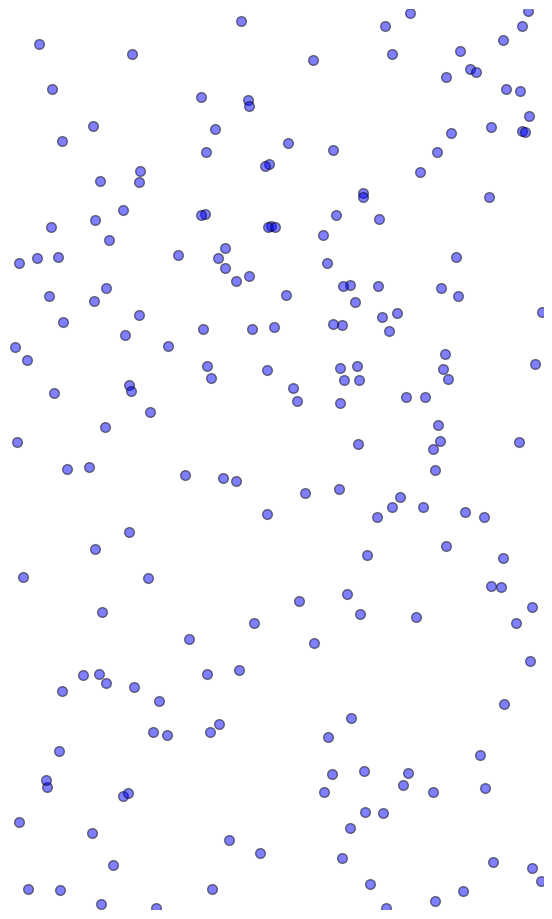

In [6]:
# Crear animación graficando la posición de cada
# punto en cada frame
def func(frame):
  ax.clear()
  plt.plot(info_frames[frame,0,:],info_frames[frame,1,:],
           'o', color='b', mec='k', alpha=0.5, ms=7)
  plt.xlim([-1, 1])
  plt.ylim([-3.375, 3.375])
  plt.axis('off')

fig, ax = plt.subplots(figsize=(5.33333,9))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

anim = FuncAnimation(fig,func,nframes,interval= int_miliseg)
anim.save("animacion.mp4", dpi=300)